# Урок 3. kNN

В уроке мы разобрали построение модели kNN на базовом наборе данных Iris. Для лучшего понимания, как работает алгоритм, мы использовали только два признака - длину и ширину лепестка.

Однако другие признаки тоже могли быть важны для получения моделью более детальной информации об объектах и, соответственно, построения более точных прогнозов.

### 1.
Поочередно добавьте к признакам (petal length, petal width) из урока  оставшиеся признаки, чтобы получилось: 1) (sepal length, petal length, petal width); 2) (sepal width, petal length, petal width).

*Примечание: признаки могут быть расположены в любом порядке.*

In [1]:
from sklearn.datasets import load_iris

Напомним порядок расположения признаков в массиве данных

In [6]:
iris_dataset = load_iris()
iris_dataset['feature_names']


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Для формирования массива новых признаков проще воспользоваться не срезами, как мы делали в уроке - iris_dataset.data[:, 2:4] (здесь мы показываем, что выбираем только со 2го по 4й столбец, причем не включая 2й), а просто удалить один из ненужных нам столбцов с помощью функции библиотеки *numpy.delete*

**Пример**

In [7]:
import numpy as np

In [8]:
a = np.array([[ 0,  1,  2,  3],
               [ 4,  5,  6,  7],
               [ 8,  9, 10, 11],
               [12, 13, 14, 15]])

a_new = np.delete(a, 0, axis=1)
a_new

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11],
       [13, 14, 15]])

In [32]:
# type(iris_dataset)

iris_dataset_1 = np.delete(iris_dataset.data, 1, axis=1)
iris_dataset_2 = np.delete(iris_dataset.data, 0, axis=1)
iris_dataset_2


array([[3.5, 1.4, 0.2],
       [3. , 1.4, 0.2],
       [3.2, 1.3, 0.2],
       [3.1, 1.5, 0.2],
       [3.6, 1.4, 0.2],
       [3.9, 1.7, 0.4],
       [3.4, 1.4, 0.3],
       [3.4, 1.5, 0.2],
       [2.9, 1.4, 0.2],
       [3.1, 1.5, 0.1],
       [3.7, 1.5, 0.2],
       [3.4, 1.6, 0.2],
       [3. , 1.4, 0.1],
       [3. , 1.1, 0.1],
       [4. , 1.2, 0.2],
       [4.4, 1.5, 0.4],
       [3.9, 1.3, 0.4],
       [3.5, 1.4, 0.3],
       [3.8, 1.7, 0.3],
       [3.8, 1.5, 0.3],
       [3.4, 1.7, 0.2],
       [3.7, 1.5, 0.4],
       [3.6, 1. , 0.2],
       [3.3, 1.7, 0.5],
       [3.4, 1.9, 0.2],
       [3. , 1.6, 0.2],
       [3.4, 1.6, 0.4],
       [3.5, 1.5, 0.2],
       [3.4, 1.4, 0.2],
       [3.2, 1.6, 0.2],
       [3.1, 1.6, 0.2],
       [3.4, 1.5, 0.4],
       [4.1, 1.5, 0.1],
       [4.2, 1.4, 0.2],
       [3.1, 1.5, 0.2],
       [3.2, 1.2, 0.2],
       [3.5, 1.3, 0.2],
       [3.6, 1.4, 0.1],
       [3. , 1.3, 0.2],
       [3.4, 1.5, 0.2],
       [3.5, 1.3, 0.3],
       [2.3, 1.3

In [19]:
# если работаете в интерактивной оболочке IPython
%matplotlib inline

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

**Пример** построения трехмерного графика

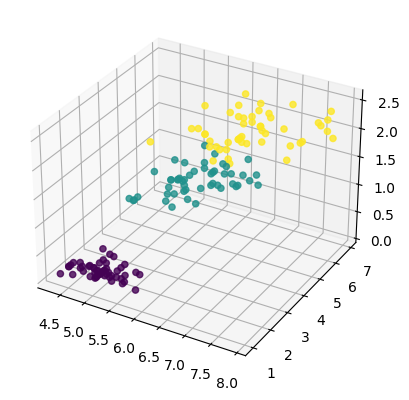

In [29]:
ax = plt.axes(projection='3d')

xdata = iris_dataset_1[:, 0]  # np.array([elem[0] for elem in iris_dataset_1]) # точки оси X
ydata = iris_dataset_1[:, 1]  # np.array([elem[1] for elem in iris_dataset_1]) # точки оси Y
zdata = iris_dataset_1[:, 2]  # np.array([elem[2] for elem in iris_dataset_1]) # точки оси Z
colors = iris_dataset.target

ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=colors)

**Примечание: для установки цвета в функции используйте *c=iris_dataset.target*.**

In [30]:
ax = plt.axes(projection='3d')

xdata = iris_dataset[]
ydata = np.cos(zdata) + 0.1 * np.random.randn(100) # точки оси Y
zdata = 15 * np.random.random(100) # точки оси Z

# Здесь не понял, что делать, может быть, ничего? :) Код приведен с ошибкой.

SyntaxError: invalid syntax (2060689466.py, line 3)

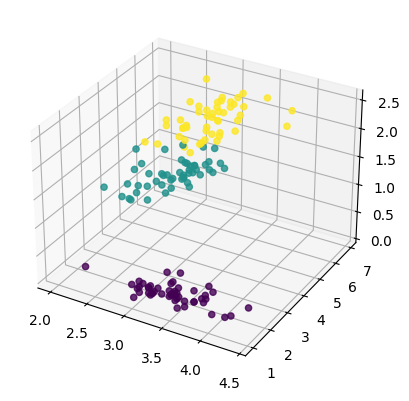

In [33]:
ax = plt.axes(projection='3d')

xdata = iris_dataset_2[:, 0]  # np.array([elem[0] for elem in iris_dataset_1]) # точки оси X
ydata = iris_dataset_2[:, 1]  # np.array([elem[1] for elem in iris_dataset_1]) # точки оси Y
zdata = iris_dataset_2[:, 2]  # np.array([elem[2] for elem in iris_dataset_1]) # точки оси Z
colors = iris_dataset.target
ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=colors)

### 3.
С помощью функции sklearn.model_selection.train_test_split разделите данные на тренировочный и тестовый датасеты и затем, применив библиотечную версию алгоритма sklearn.neighbors.KNeighborsClassifier, постройте модель для наборов данных *iris_dataset_1* и *iris_dataset_2* (по умолчанию используйте n_neighbors=5).

*Примечание: в функции train_test_split используйте параметр random_state=17 для воспроизводимости результатов.*

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [43]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(iris_dataset_1, iris_dataset.target, random_state=17)
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(x_train_1, y_train_1)
y_pred_1 = knn1.predict(x_test_1)
# type(y_pred_1)

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(iris_dataset_2, iris_dataset.target, random_state=17)
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(x_train_2, y_train_2)
y_pred_2 = knn2.predict(x_test_2)




### 4.
Проверьте точность работы обеих моделей, используя встроенную функцию sklearn.metrics.accuracy_score. Сравните результат их работы с результатом, полученным на наборе данных с двумя признаками (который разбирался в уроке), и укажите ответ.

In [44]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_1 = accuracy_score(y_test_1, y_pred_1)
accuracy_2 = accuracy_score(y_test_2, y_pred_2)

print(f'Accuracy_1: {accuracy_1}, accuracy_2: {accuracy_2}')

# Точность та же самая, что и у приведенного в урове алгоритма

Accuracy_1: 0.9736842105263158, accuracy_2: 0.9736842105263158


### 5.
Постройте модель на данных *x_train_1, y_train_1* с гиперпараметром n_neighbors, пробегающим значения от 1 до 20 включительно, и укажите значения n_neighbors, которым соответствует наиболее высокий результат функции accuracy_score().

*Примечание: можно воспользоваться циклом for, чтобы не прописывать вручную все 20 вариаций модели.*

In [55]:
acc_list = []

for i in range(20):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(x_train_1, y_train_1)
    y_pred_1 = knn.predict(x_test_1)
    acc_list.append(accuracy_score(y_test_1, y_pred_1))
    
for i, acc in enumerate(acc_list):
    print(f'{i+1} neighbours: Accuracy: {acc}')
    
print()
print(f'Maximum accuracy: {max(acc_list)} at {acc_list.index(max(acc_list)) + 1} neighbours')
# А также при 2, 3, 5, 11 и 15 соседях

1 neighbours: Accuracy: 0.9736842105263158
2 neighbours: Accuracy: 0.9736842105263158
3 neighbours: Accuracy: 0.9736842105263158
4 neighbours: Accuracy: 0.9473684210526315
5 neighbours: Accuracy: 0.9736842105263158
6 neighbours: Accuracy: 0.9473684210526315
7 neighbours: Accuracy: 0.9473684210526315
8 neighbours: Accuracy: 0.9210526315789473
9 neighbours: Accuracy: 0.9473684210526315
10 neighbours: Accuracy: 0.9473684210526315
11 neighbours: Accuracy: 0.9736842105263158
12 neighbours: Accuracy: 0.9210526315789473
13 neighbours: Accuracy: 0.9473684210526315
14 neighbours: Accuracy: 0.9210526315789473
15 neighbours: Accuracy: 0.9736842105263158
16 neighbours: Accuracy: 0.9473684210526315
17 neighbours: Accuracy: 0.9473684210526315
18 neighbours: Accuracy: 0.9210526315789473
19 neighbours: Accuracy: 0.9210526315789473
20 neighbours: Accuracy: 0.9210526315789473

Maximum accuracy: 0.9736842105263158 at 1 neighbours
